In [3]:
import pandas as pd
import numpy as np

# Brittany cleans:
customer_df = pd.read_csv('data/twm_customer.csv', sep=';')
savings_acct_df = pd.read_csv('data/twm_savings_acct.csv', sep=';')
savings_tran_df = pd.read_csv('data/twm_savings_tran.csv', sep=';')
transactions_df = pd.read_csv('data/twm_transactions.csv', sep=';')

## Review Data Information and Types

In [3]:
# Display the first 5 rows of customer_df
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [4]:
#Check individual result in customer_df to compare to other dataframe
customer_df.loc[customer_df['cust_id'] == 1362806]

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
511,1362806,39382,24,3,1,M,3,Mr.,Randy ...,McCarthy ...,15648,Juniper ...,60605,Chicago,IL


In [5]:
# Display the first 5 rows of savings_acct_df
savings_acct_df.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [6]:
# Display the first 5 rows of savings_tran_df
savings_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP


In [7]:
# Display the first 5 rows of transactions_df
transactions_df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [8]:
# Get information about the columns and data types 
customer_df.info()
savings_acct_df.info()
savings_tran_df.info()
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data co

## Review Null Values for Each Table

In [9]:
#check for null values in customer_df
customer_df.isnull().sum()  

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [10]:
#check for null values in savings_acct_df
savings_acct_df.isnull().sum()   

cust_id               0
acct_nbr              0
minimum_balance       0
acct_type             0
account_active        0
acct_start_date       0
acct_end_date       375
starting_balance      0
ending_balance        0
dtype: int64

In [11]:
#check for null values in savings_trans_df
savings_tran_df.isnull().sum()  

cust_id          0
tran_id          0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64

In [12]:
#check for null values in transactions_df
transactions_df.isnull().sum() 

tran_id          0
acct_nbr         0
tran_amt         0
principal_amt    0
interest_amt     0
new_balance      0
tran_date        0
tran_time        0
channel          0
tran_code        0
dtype: int64

In [13]:
#Further explore null values in savings_acct_df
null_values_df = savings_acct_df[savings_acct_df.isnull().any(axis=1)]
null_values_df.head(10)

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
5,1362609,13626093,500,MM,Y,22.6.1995,NaN,758.41,49.39
6,1363465,13634653,500,MM,Y,27.4.1994,NaN,573.48,590.92
7,1363078,13630783,100,BS,Y,26.8.1992,NaN,127.81,596.38
8,1362588,13625883,100,BS,Y,20.10.1990,NaN,252.24,9.71
9,1363343,13633433,500,MM,Y,14.3.1995,NaN,603.82,2007.65
10,1362853,13628533,500,MM,Y,10.6.1995,NaN,918.64,1025.23
11,1363404,13634043,100,BS,Y,22.2.1995,NaN,114.29,550.73


##### The savings_acct_df has 375 null values out of 421 rows under the acct_end_date variable. I anticipate that these null rows are due to accounts still being active and therefore not having a closure data.

In [14]:
# For Consideration: Drop the variable acct_end_date in the savings_acct_df table due to null values
# savings_acct_df.dropna(subset=['acct_end_date'], inplace=True)

## Check for Duplicate Values

In [15]:
# check for duplicates based on all columns
customer_df_duplicates = customer_df[customer_df.duplicated()]

# print the duplicate rows
print(customer_df_duplicates)

Empty DataFrame
Columns: [cust_id, income, age, years_with_bank, nbr_children, gender, marital_status, name_prefix, first_name, last_name, street_nbr, street_name, postal_code, city_name, state_code]
Index: []


In [16]:
# check for duplicates based on all columns
savings_acct_df_duplicates = savings_acct_df[savings_acct_df.duplicated()]

# print the duplicate rows
print(savings_acct_df_duplicates)

Empty DataFrame
Columns: [cust_id, acct_nbr, minimum_balance, acct_type, account_active, acct_start_date, acct_end_date, starting_balance, ending_balance]
Index: []


In [17]:
# check for duplicates based on all columns
savings_tran_df_duplicates = savings_tran_df[savings_tran_df.duplicated()]

# print the duplicate rows
print(savings_tran_df_duplicates)

Empty DataFrame
Columns: [cust_id, tran_id, tran_amt, principal_amt, interest_amt, new_balance, tran_date, tran_time, channel, tran_code]
Index: []


In [18]:
# check for duplicates based on all columns
transactions_df_duplicates = transactions_df[transactions_df.duplicated()]

# print the duplicate rows
print(transactions_df_duplicates)

Empty DataFrame
Columns: [tran_id, acct_nbr, tran_amt, principal_amt, interest_amt, new_balance, tran_date, tran_time, channel, tran_code]
Index: []


##### No duplicates found across dataframes

## Convert Date Columns into Datetime Format

#### Convert savings_acct_df acct_start_date and acct_end_date variables

In [19]:
savings_acct_df['acct_start_date']= pd.to_datetime(savings_acct_df['acct_start_date'], format='%d.%m.%Y')
savings_acct_df['acct_end_date'] = pd.to_datetime(savings_acct_df['acct_end_date'], format='%d.%m.%Y')
savings_acct_df.head(10)

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,1988-05-09,NaT,113.04,122.54
1,1362487,13624873,500,MM,N,1994-06-27,1995-08-25,651.73,12.89
2,1362548,13625483,100,BS,Y,1986-11-11,NaT,250.24,254.02
3,1362752,13627523,100,BS,Y,1995-02-20,NaT,600.26,609.33
4,1363017,13630173,100,BS,N,1994-04-27,1995-10-31,2011.02,2901.35
5,1362609,13626093,500,MM,Y,1995-06-22,NaT,758.41,49.39
6,1363465,13634653,500,MM,Y,1994-04-27,NaT,573.48,590.92
7,1363078,13630783,100,BS,Y,1992-08-26,NaT,127.81,596.38
8,1362588,13625883,100,BS,Y,1990-10-20,NaT,252.24,9.71
9,1363343,13633433,500,MM,Y,1995-03-14,NaT,603.82,2007.65


#### Convert the savings_tran_df tables tran_date and tran_time variables to Datetime

In [43]:
#Apply Lambada Function to tran_time to add a 0 to the beginning of any 5 digit row values
savings_tran_df['tran_time'] = savings_tran_df['tran_time'].apply(lambda x: '0' + x if len(x) == 5 else x)

# Use Lambada function to slice all of the 6-digit row values in H, M, S
savings_tran_df['tran_time'] = savings_tran_df['tran_time'].apply(lambda x: x[:-4] + ':' + x[-4:-2] + ':' + x[-2:] if len(x) == 6 else x)

In [57]:
# Convert tran_date to datetime
savings_tran_df['tran_date']= pd.to_datetime(savings_tran_df['tran_date'], format='%d.%m.%Y')

#Convert tran_time to datetime and then extract the time portion
savings_tran_df['tran_time'] = pd.to_datetime(savings_tran_df['tran_time'], format='%H:%M:%S', errors='coerce')
savings_tran_df['tran_time'] = savings_tran_df['tran_time'].dt.time
savings_tran_df.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,1995-10-26,08:41:11,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,1995-01-31,23:59:59,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,1995-04-30,23:59:59,,IN
3,1362542,4,0.76,0.00,0.76,610.92,1995-04-30,23:59:59,,IN
4,1363387,11,148.69,148.69,0.00,470.05,1995-05-21,14:47:36,E,DP


#### Convert the transactions_df tables tran_date and tran_time variables to datetime

In [60]:
# Convert all row values to strings
transactions_df['tran_time'] = transactions_df['tran_time'].astype(str)

#Apply Lambada Function to tran_time to add a 0 to the beginning of any 5 digit row values
transactions_df['tran_time'] = transactions_df['tran_time'].apply(lambda x: '0' + x if len(x) == 5 else x)

# Use Lambada function to slice all of the 6-digit row values in H, M, S
transactions_df['tran_time'] = transactions_df['tran_time'].apply(lambda x: x[:-4] + ':' + x[-4:-2] + ':' + x[-2:] if len(x) == 6 else x)

In [62]:
# Convert tran_date to datetime
transactions_df['tran_date']= pd.to_datetime(transactions_df['tran_date'], format='%d.%m.%Y')

#Convert tran_time to datetime and then extract the time portion
transactions_df['tran_time'] = pd.to_datetime(transactions_df['tran_time'], format='%H:%M:%S', errors='coerce')
transactions_df['tran_time'] = transactions_df['tran_time'].dt.time
transactions_df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,1995-10-21,12:16:56,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,1995-02-05,15:30:53,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,1995-07-23,NaT,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,1995-01-30,NaT,,FK
4,31,13625722,0.00,0.00,0.0,240.55,1995-01-25,20:45:21,B,IQ


## Map account_active variable (in savings_acct_df) and gender variable (in customer_df)

#### Mapping account_active variable that has the options of Yes (Y) or No (N), where Y = 1 and N = 0.

In [226]:
# Remove white spaces from the column values in account_active
savings_acct_df['account_active'] = savings_acct_df['account_active'].str.strip()

# Create a dictionary to map 'Y' and 'N' to 1 and 0
active_dict = {'Y': 1, 'N': 0}

# Map the values in the column to 1 and 0
savings_acct_df['account_active'] = savings_acct_df['account_active'].map(active_dict)

# Check the values in the column
print(savings_acct_df['account_active'].value_counts())

account_active
1    375
0     46
Name: count, dtype: int64


#### Mapping gender variable with the options of Male (M) and Female (F), where M = 1 and F = 0.

In [227]:
# Remove white spaces from the column values in account_active
customer_df['gender'] = customer_df['gender'].str.strip()

# Create a dictionary to map 'Y' and 'N' to 1 and 0
gender_dict = {'M': 1, 'F': 0}

# Map the values in the column to 1 and 0
customer_df['gender'] = customer_df['gender'].map(gender_dict)

# Check the values in the column
print(customer_df['gender'].value_counts())

gender
0    418
1    329
Name: count, dtype: int64


In [228]:
savings_acct_df.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,1,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,0,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,1,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,1,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,0,27.4.1994,31.10.1995,2011.02,2901.35


## Create Dummy Variables

#### Adding binary true/false dummy variables to the dataframe will indicate whether an account is a Money Market or Basic Savings account. This will allow for easier analysis of account types and potential differences in account usage and customer characteristics.

In [229]:
# create dummy variables for savings account type (Money Market - MM, or Basic Savings - BS)
dummy_acct_type = pd.get_dummies(savings_acct_df['acct_type'], prefix='acct_type')

# join dummy variables to the original dataframe
savings_acct_df = pd.concat([savings_acct_df, dummy_acct_type], axis=1)

# print the updated dataframe
savings_acct_df.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,acct_type_BS,acct_type_MM
0,1363160,13631603,100,BS,1,9.5.1988,NaN,113.04,122.54,True,False
1,1362487,13624873,500,MM,0,27.6.1994,25.8.1995,651.73,12.89,False,True
2,1362548,13625483,100,BS,1,11.11.1986,NaN,250.24,254.02,True,False
3,1362752,13627523,100,BS,1,20.2.1995,NaN,600.26,609.33,True,False
4,1363017,13630173,100,BS,0,27.4.1994,31.10.1995,2011.02,2901.35,True,False


## Review Descriptive Stats for Each Table

In [230]:
# Get descriptive stats for customer_df
customer_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,0.440428,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.496771,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,1.000000,4.000000,19940.000000,98186.000000


In [231]:
# Get descriptive stats for savings_acct_df
savings_acct_df.describe()

,cust_id,acct_nbr,minimum_balance,account_active,starting_balance,ending_balance
count,4.210000e+02,4.210000e+02,421.000000,421.000000,421.000000,421.000000
mean,1.362987e+06,1.362988e+07,194.061758,0.890736,874.060950,1258.060736
std,2.951807e+02,2.951807e+03,169.839941,0.312341,1704.224338,2054.680311
min,1.362480e+06,1.362480e+07,100.000000,0.000000,100.240000,2.740000
25%,1.362722e+06,1.362722e+07,100.000000,1.000000,180.220000,254.020000
50%,1.362980e+06,1.362980e+07,100.000000,1.000000,310.620000,619.050000
75%,1.363253e+06,1.363253e+07,100.000000,1.000000,742.280000,1535.830000
max,1.363495e+06,1.363495e+07,500.000000,1.000000,17303.420000,22432.780000


In [232]:
# Get descriptive stats for savings_tran_df
savings_tran_df.describe()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance
count,1.118900e+04,11189.000000,11189.000000,11189.000000,11189.000000,11189.000000
mean,1.362988e+06,16.113504,14.458362,13.628621,0.829741,1229.467968
std,2.979129e+02,11.024730,221.971173,222.003741,2.856393,2256.670395
min,1.362480e+06,1.000000,-2495.880000,-2495.880000,0.000000,0.070000
25%,1.362720e+06,7.000000,-0.750000,-0.750000,0.000000,238.480000
50%,1.362978e+06,14.000000,0.390000,0.000000,0.000000,562.040000
75%,1.363262e+06,23.000000,7.340000,0.000000,0.480000,1247.300000
max,1.363495e+06,62.000000,4478.610000,4478.610000,44.680000,26016.690000


In [233]:
# Get descriptive stats for transactions_df
transactions_df.describe()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_time
count,77580.000000,7.758000e+04,77580.000000,77580.000000,77580.000000,77580.000000,77580.000000
mean,38.228332,1.185674e+15,-7.748275,-8.509662,0.762784,571.571177,104277.077984
std,27.838521,2.000564e+15,312.684674,311.006502,4.427059,2158.948572,87527.030938
min,1.000000,1.362480e+07,-3312.410000,-3312.410000,0.000000,-17300.000000,0.000000
25%,15.000000,1.362824e+07,-100.000000,-100.000000,0.000000,0.000000,0.000000
50%,32.000000,1.363199e+07,-1.815000,-1.815000,0.000000,180.400000,110626.000000
75%,59.000000,4.561143e+15,0.170000,0.000000,0.000000,957.252500,184245.250000
max,155.000000,4.561143e+15,17464.520000,17300.000000,164.520000,29868.390000,235959.000000


## Plot Histogram and Scatterplots to Review Data Spread

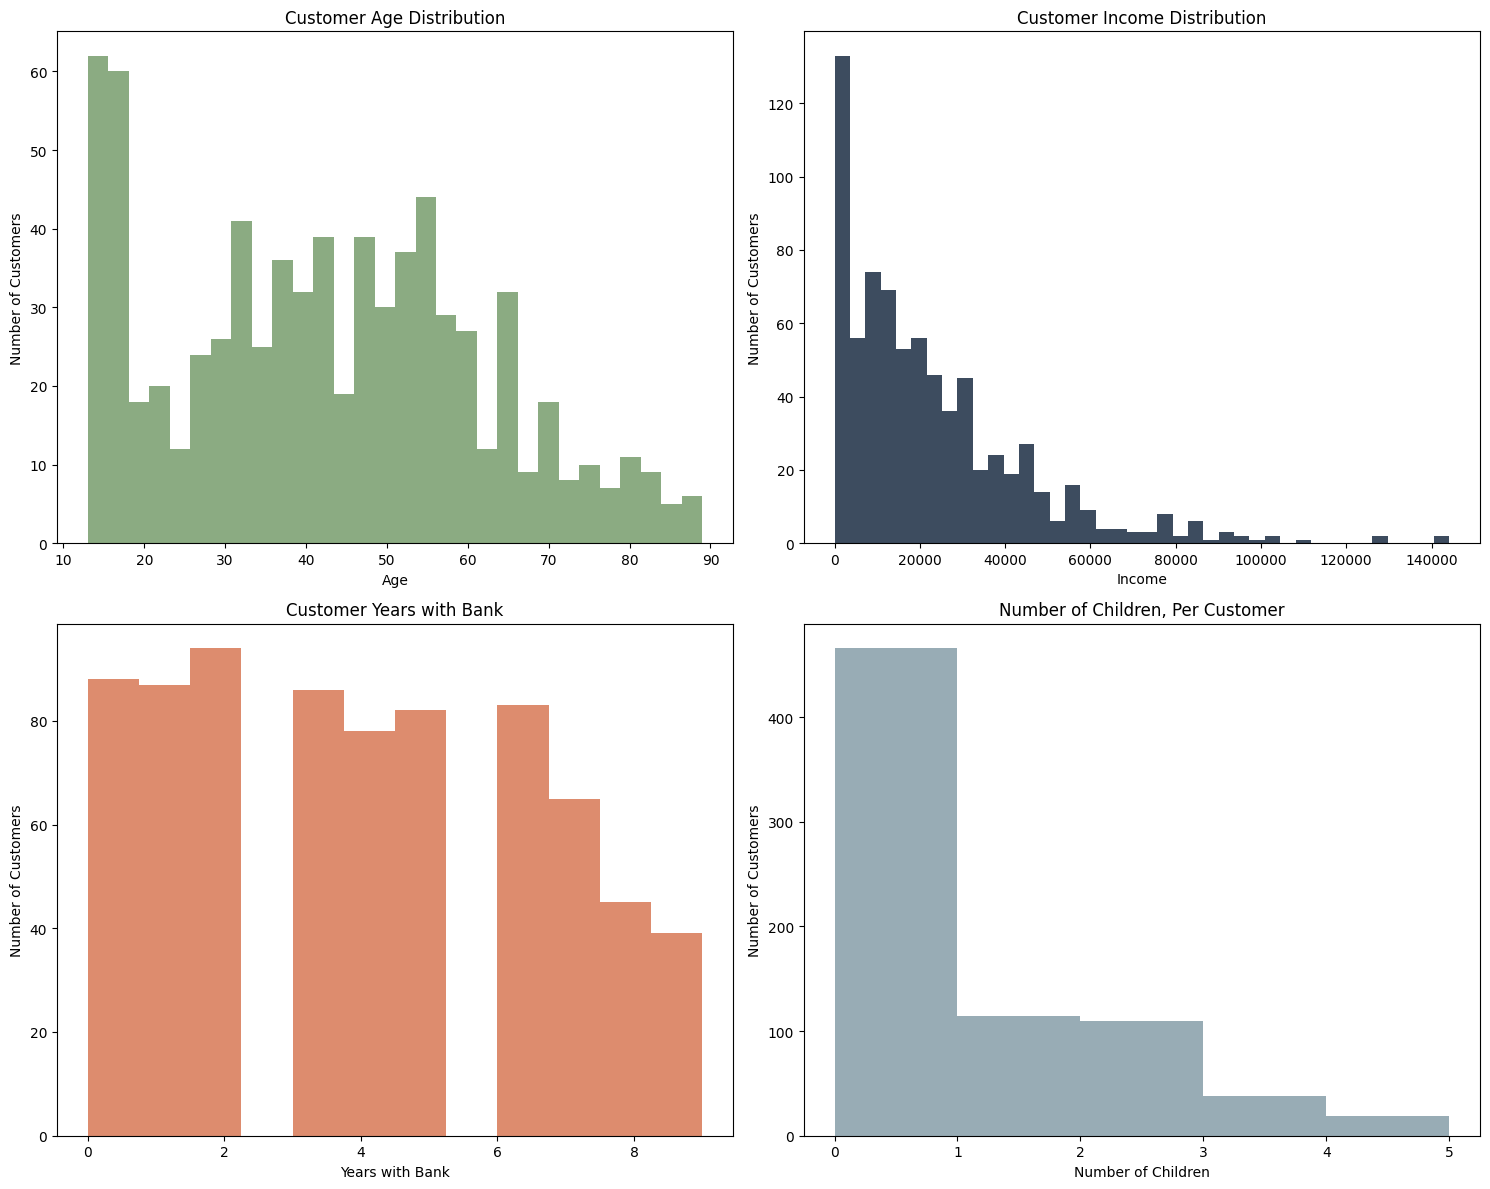

In [234]:
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot histogram of age in the first subplot
axs[0, 0].hist(customer_df['age'], bins=30, color='#8BAB82')
axs[0, 0].set_title('Customer Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Number of Customers')

# Plot histogram of income in the second subplot
axs[0, 1].hist(customer_df['income'], bins=40, color='#3D4C5F')
axs[0, 1].set_title('Customer Income Distribution')
axs[0, 1].set_xlabel('Income')
axs[0, 1].set_ylabel('Number of Customers')

# Plot histogram of years_with_bank in the third subplot
axs[1, 0].hist(customer_df['years_with_bank'], bins=12, color='#DD8C6E')
axs[1, 0].set_title('Customer Years with Bank')
axs[1, 0].set_xlabel('Years with Bank')
axs[1, 0].set_ylabel('Number of Customers')

# Plot histogram of nbr_children in the fourth subplot
axs[1, 1].hist(customer_df['nbr_children'], bins=5, color='#98ACB5')
axs[1, 1].set_title('Number of Children, Per Customer')
axs[1, 1].set_xlabel('Number of Children')
axs[1, 1].set_ylabel('Number of Customers')
        
# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the figure
plt.show()

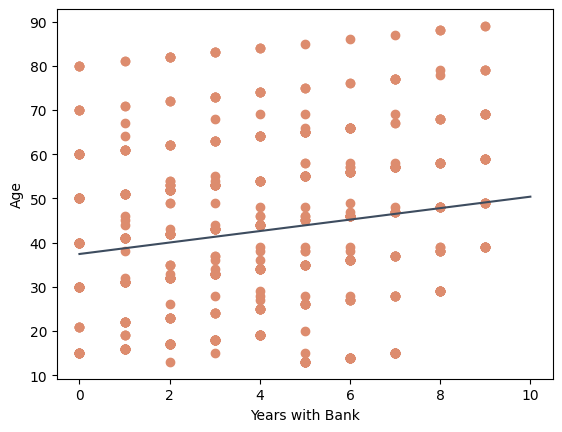

In [235]:
#Check to see if Age and Years with Bank have any correlation
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Create a scatter plot of years with bank and age
plt.scatter(customer_df['years_with_bank'], customer_df['age'], color='#DD8C6E')
plt.xlabel('Years with Bank')
plt.ylabel('Age')


# Plot the regression line
x = np.array([0, 10])
y = slope * x + intercept
plt.plot(x, y, color='#3D4C5F')

# Show the plot
plt.show()

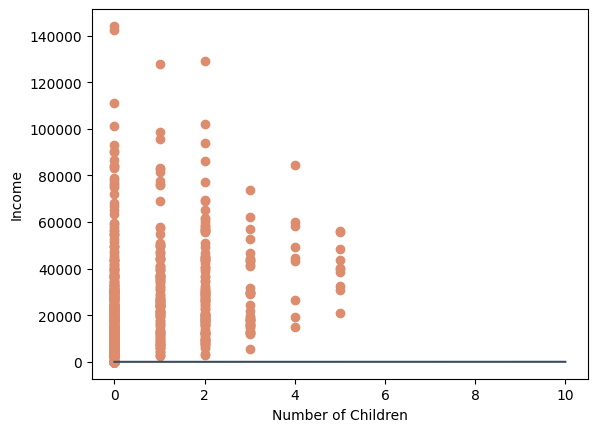

In [236]:
#Check to see if Number of Children and Income have any correlation
# Create a scatter plot of years with bank and age
plt.scatter(customer_df['nbr_children'], customer_df['income'], color='#DD8C6E')
plt.xlabel('Number of Children')
plt.ylabel('Income')


# Plot the regression line
x = np.array([0, 10])
y = slope * x + intercept
plt.plot(x, y, color='#3D4C5F')

# Show the plot
plt.show()

In [237]:
import seaborn as sns 

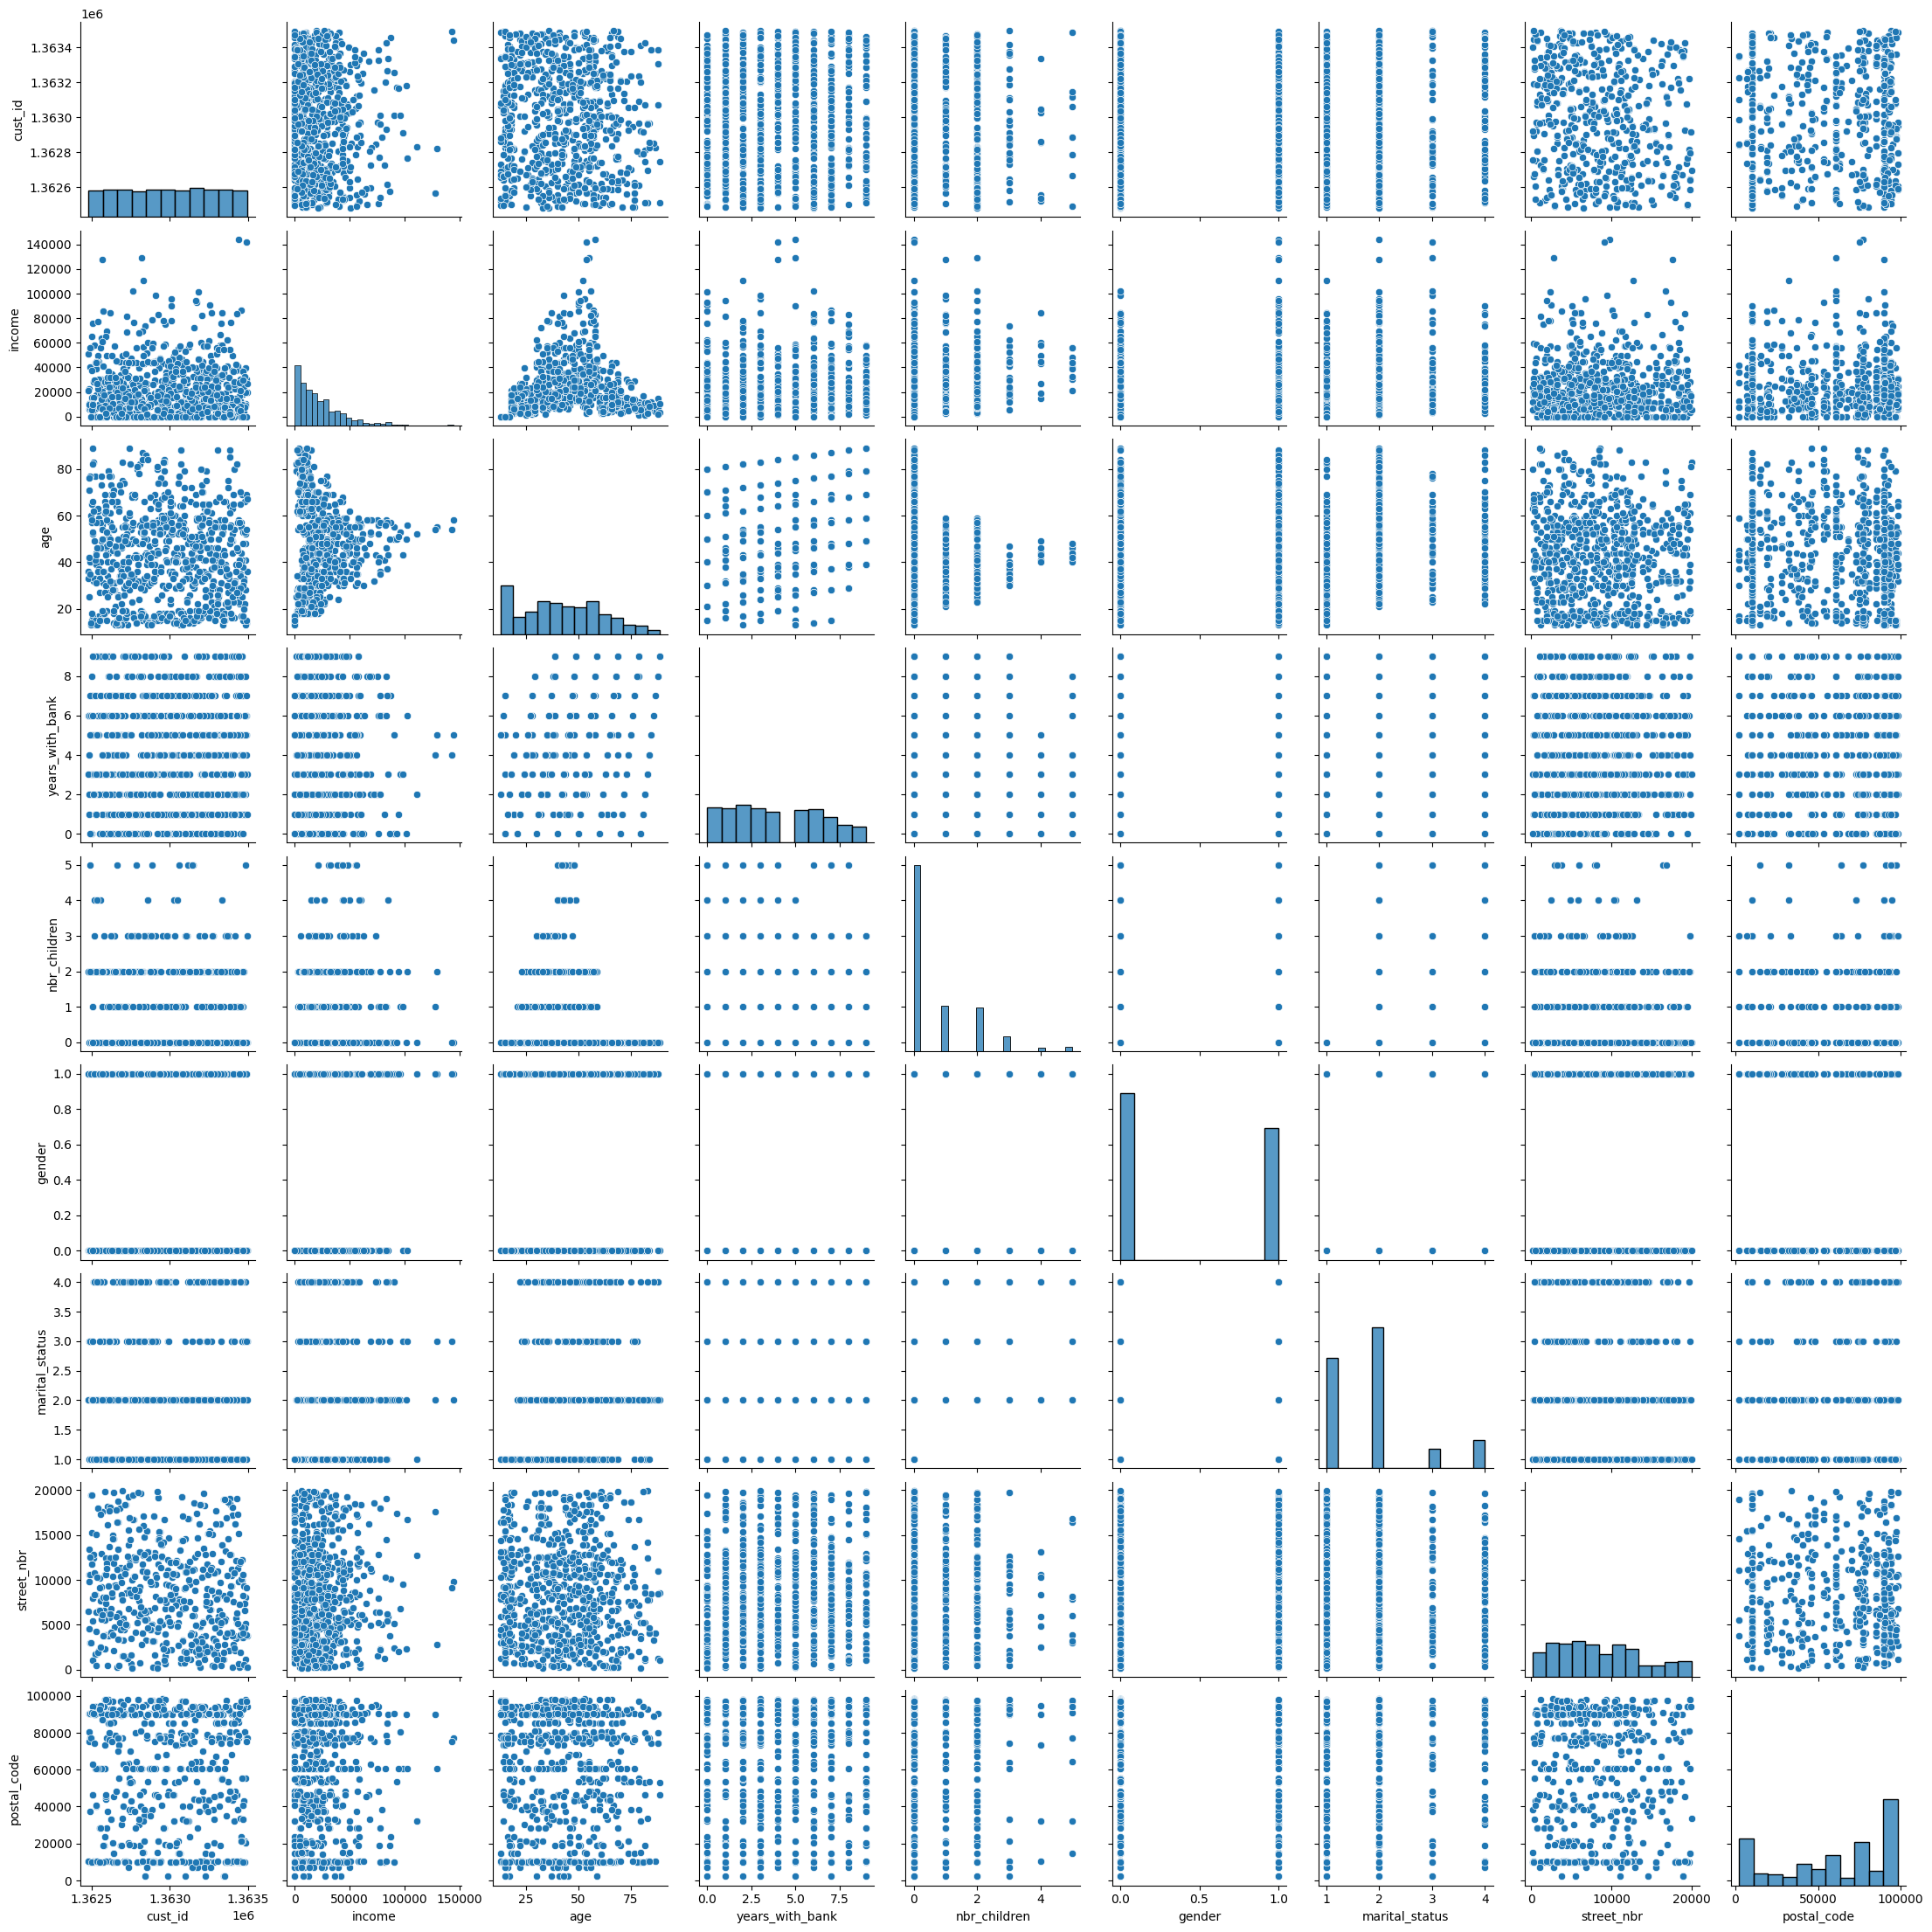

In [238]:
sns.pairplot(customer_df)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


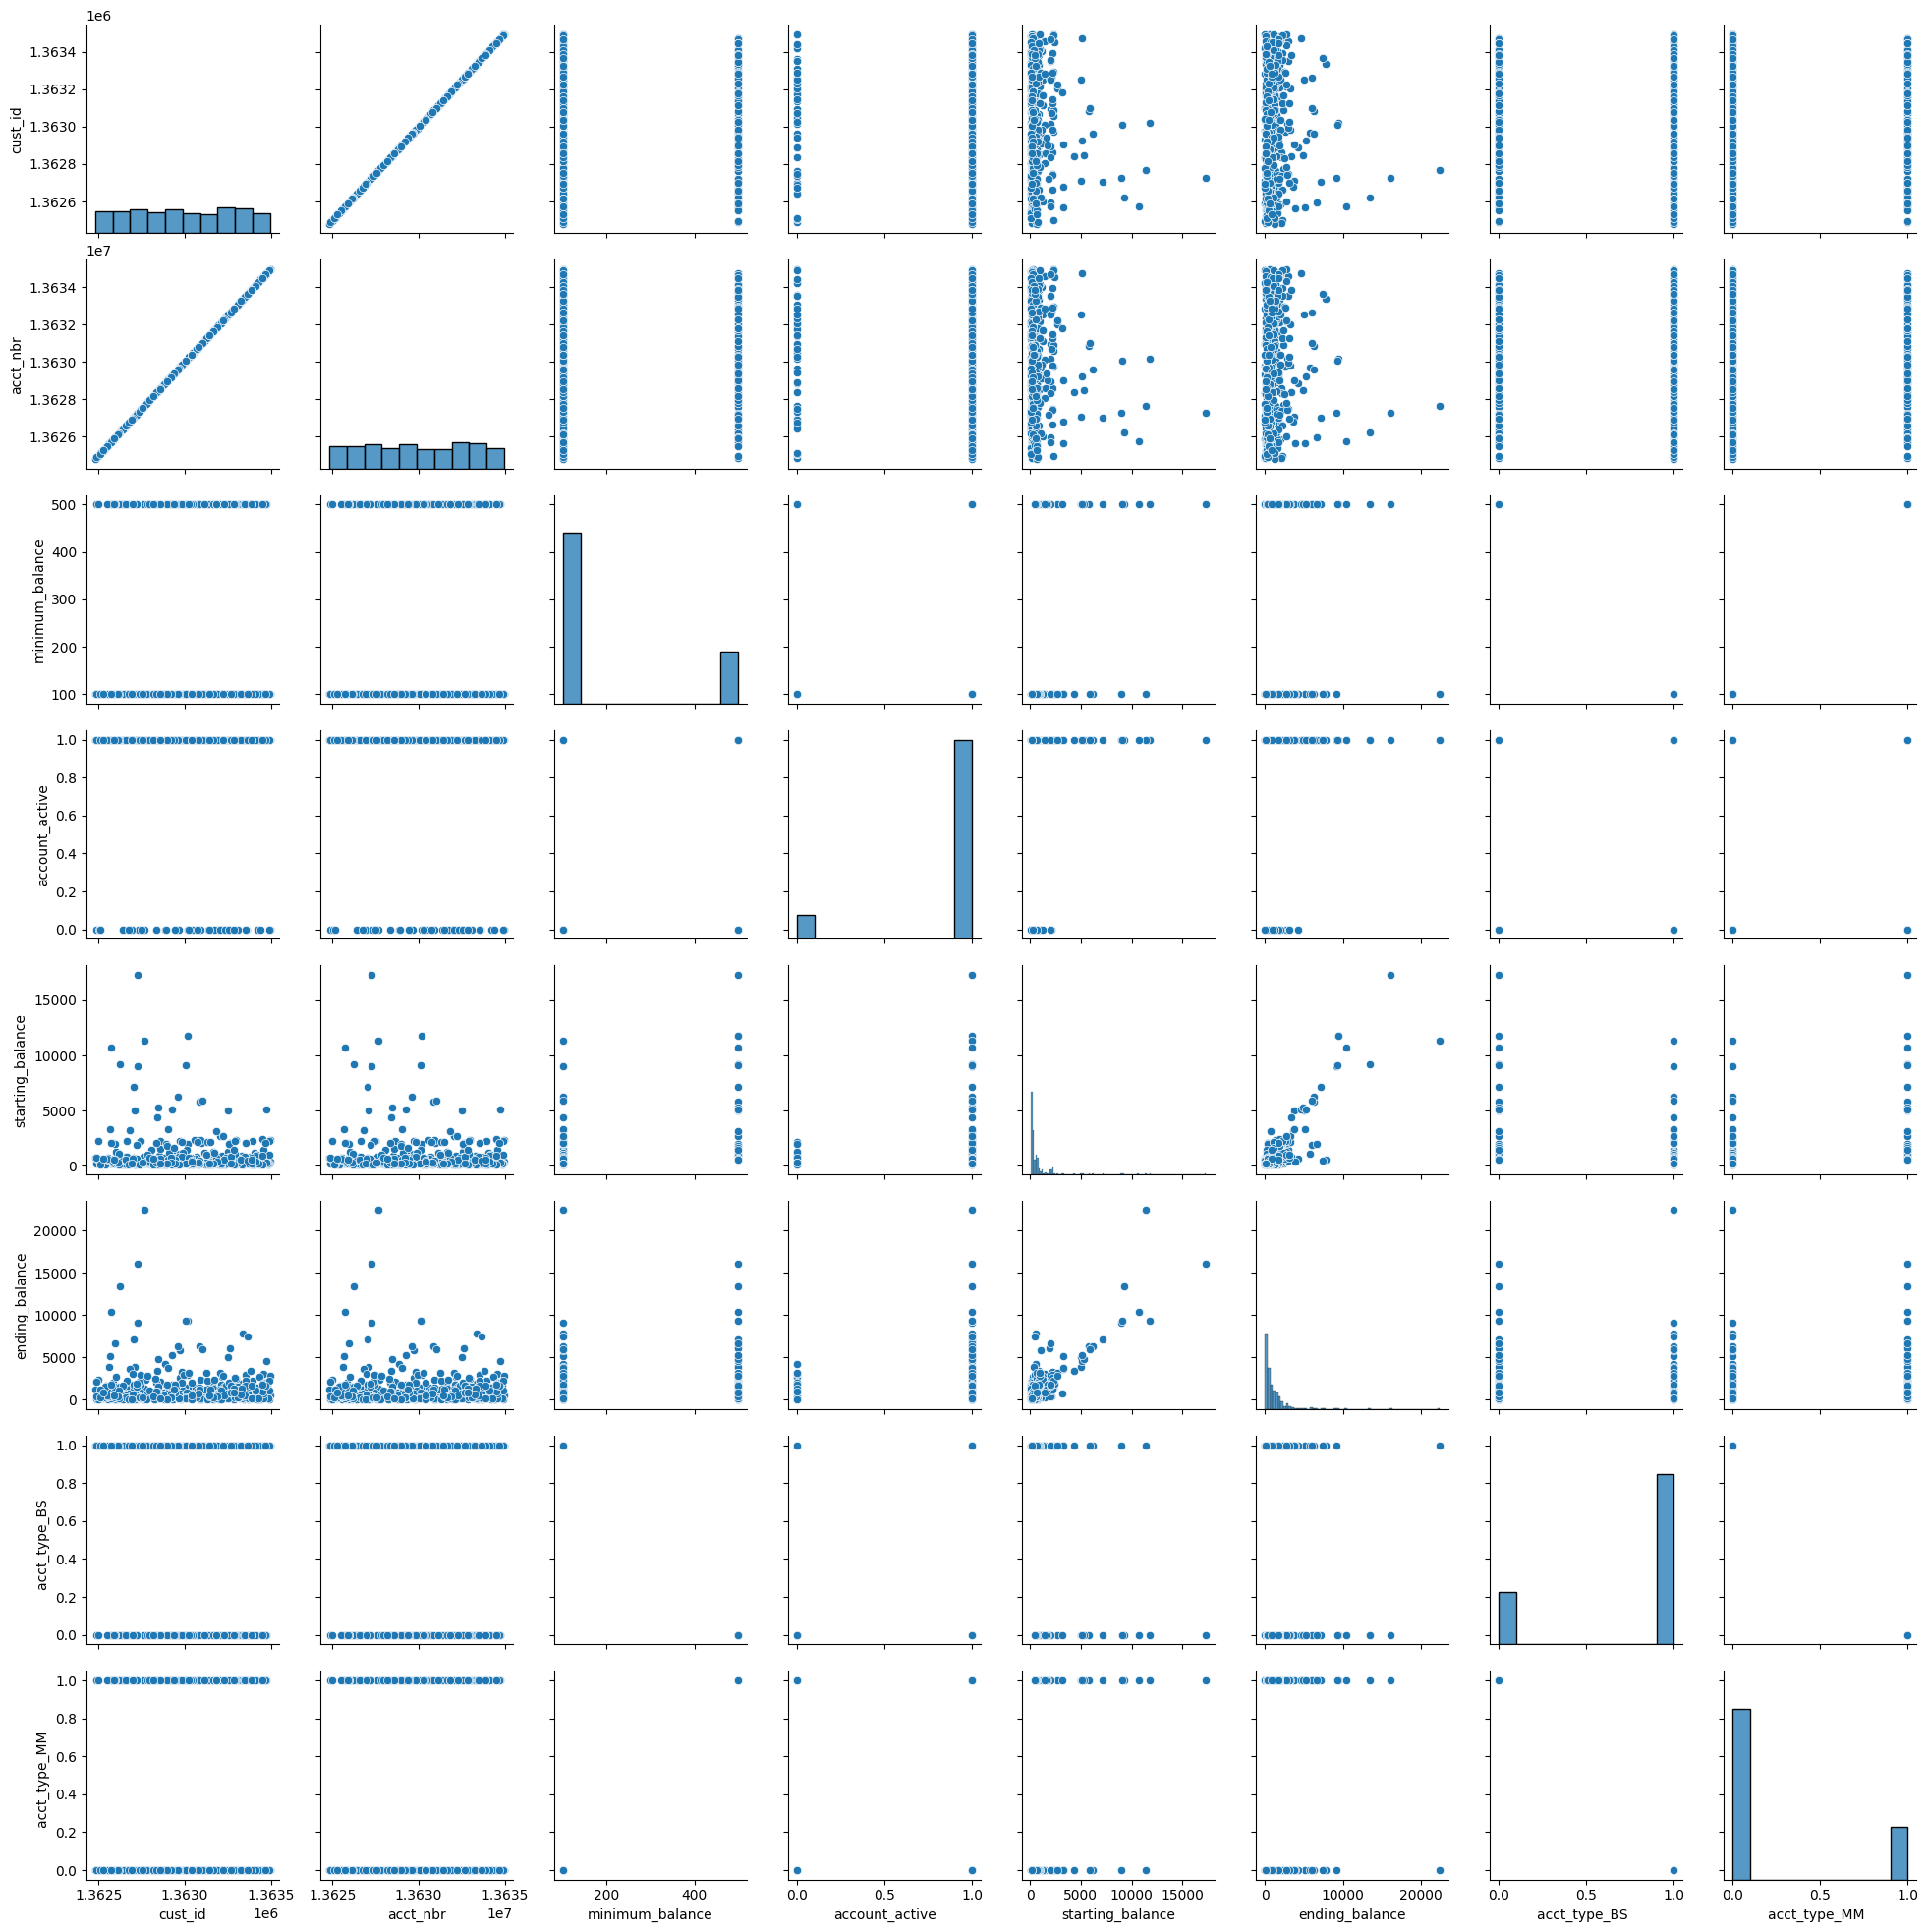

In [239]:
sns.pairplot(savings_acct_df)

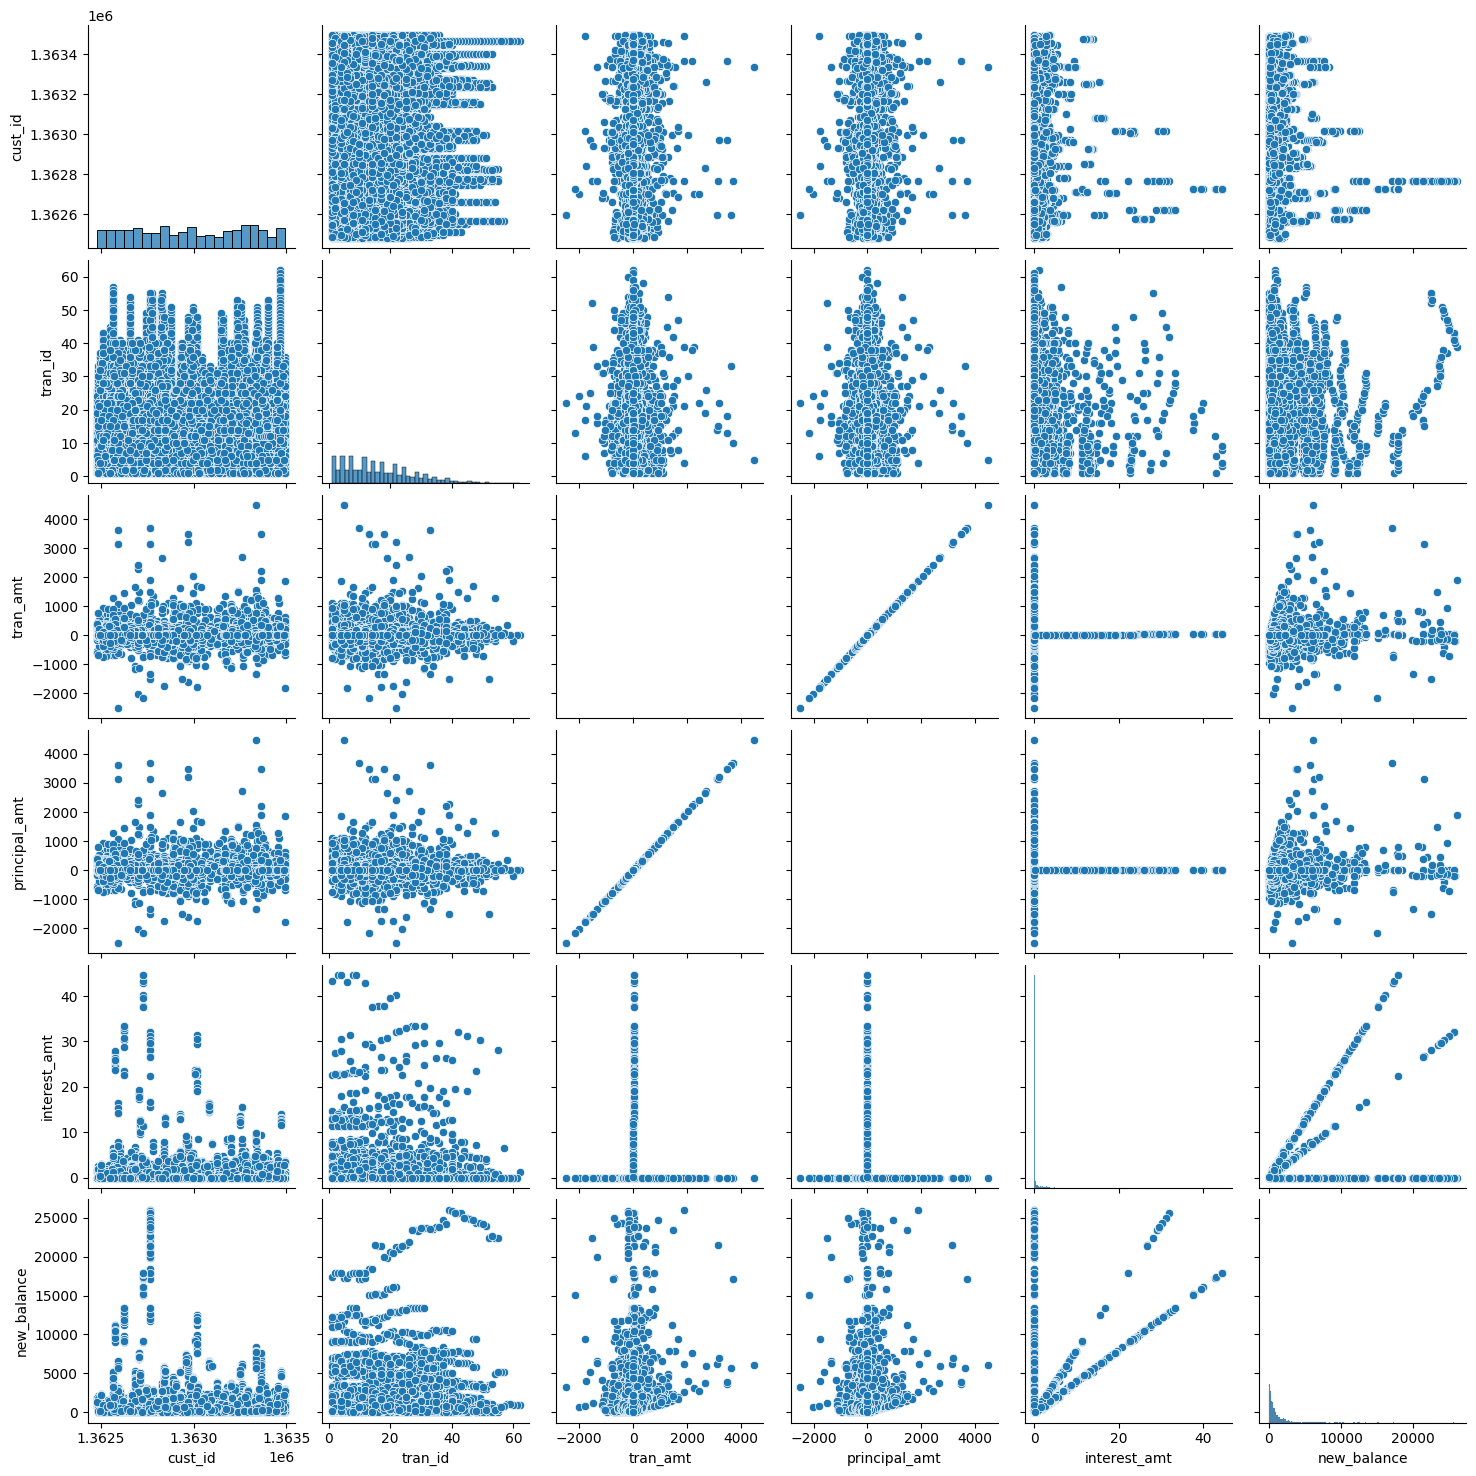

In [240]:
sns.pairplot(savings_tran_df)

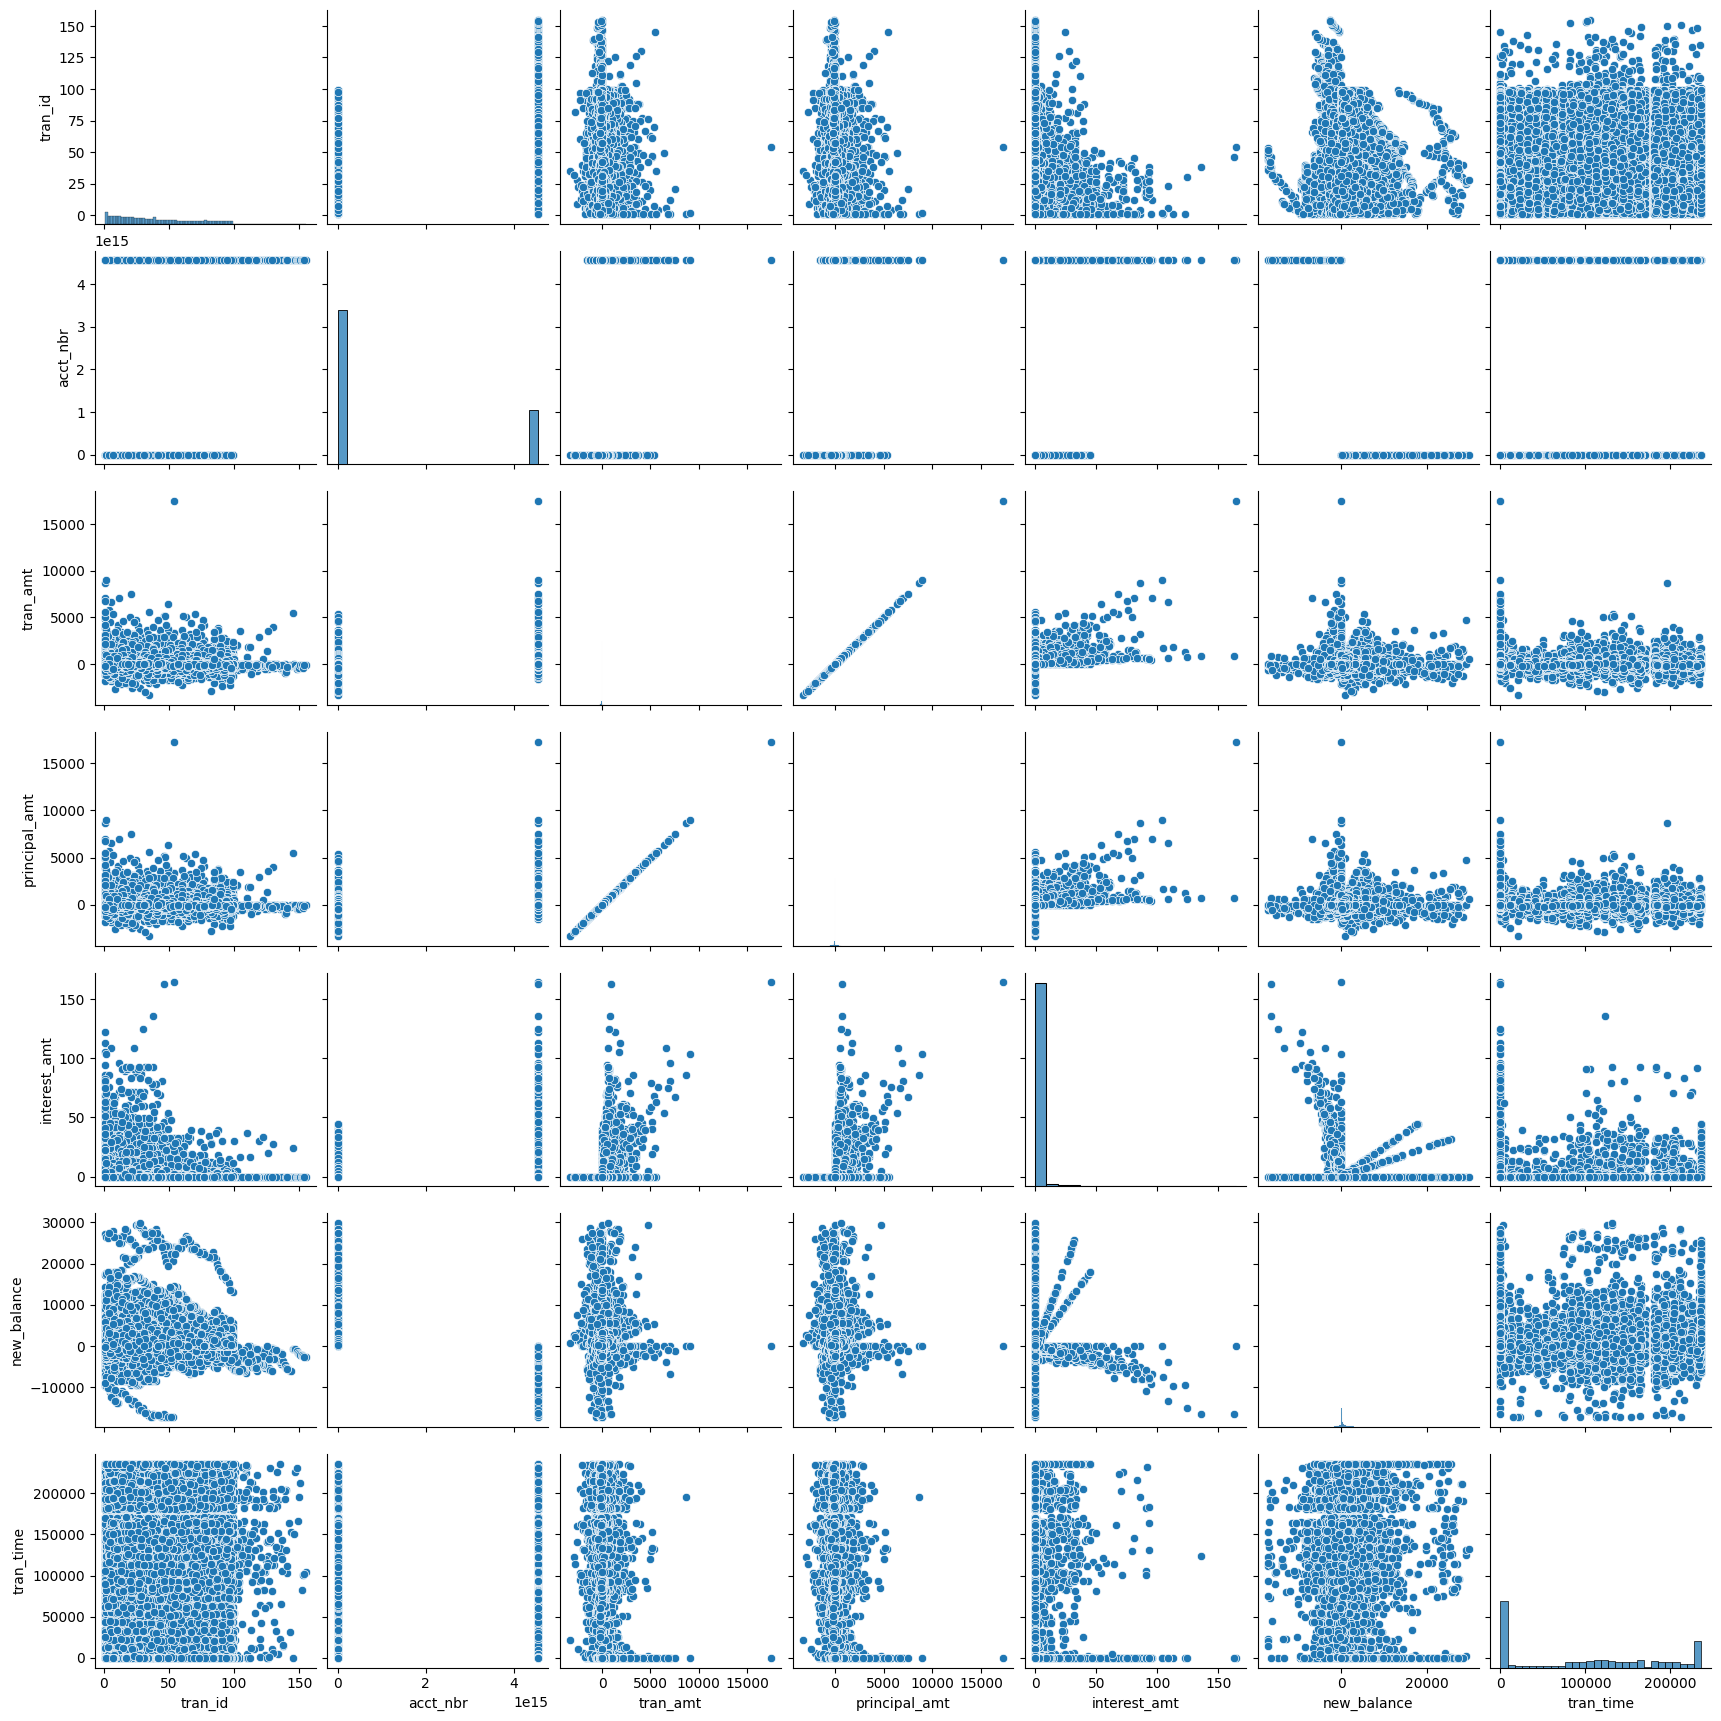

In [241]:
sns.pairplot(transactions_df)

## Convert DF to CSVs in the Clean CSV folder

In [63]:
customer_df.to_csv('clean_data/customer_df_clean.csv', index=False)
savings_acct_df.to_csv('clean_data/savings_acct_df_clean.csv', index=False)
savings_tran_df.to_csv('clean_data/savings_tran_df_clean.csv', index=False)
transactions_df.to_csv('clean_data/transactions_df_clean.csv', index=False)

## Data Merging

Importing Clean CSVs

In [51]:
import pandas as pd
customer_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/customer_df_clean.csv')
accounts_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/accounts_clean.csv')
checking_acct_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/checking_acct_clean.csv')
checking_tran_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/checking_tran_clean.csv')
credit_acct_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/credit_acct_df.csv')
credit_tran_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/credit_tran_clean.csv')
savings_acct_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/savings_acct_df_clean.csv')
savings_tran_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/savings_tran_df_clean.csv')
transactions_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/transactions_df_clean.csv')


Check Shape

In [52]:
savings_tran_df.shape
sorted_df = savings_tran_df.sort_values(by='cust_id')
# Run one test customer to see results - show only rows with cust_id equal to 1362480
test = savings_tran_df[savings_tran_df['cust_id'] == 1362480]
test

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
62,1362480,14,1.36,0.00,1.36,1089.30,1995-06-30,23:59:59,,IN
552,1362480,22,1.50,0.00,1.50,843.04,1995-09-30,23:59:59,,IN
576,1362480,1,0.00,0.00,0.00,707.09,1995-01-03,17:01:51,C,IQ
1064,1362480,9,0.00,0.00,0.00,1794.62,1995-05-19,19:27:04,K,IQ
1519,1362480,17,0.00,0.00,0.00,1092.02,1995-09-05,14:33:31,C,IQ
2053,1362480,25,341.34,341.34,0.00,1186.49,1995-12-14,10:33:26,E,DP
2081,1362480,4,1.22,0.00,1.22,978.76,1995-02-28,23:59:59,,IN
2567,1362480,12,1.48,0.00,1.48,1187.94,1995-05-31,23:59:59,,IN
3065,1362480,20,174.40,174.40,0.00,1386.67,1995-09-21,NaN,A,DP
3617,1362480,7,1.72,0.00,1.72,1379.84,1995-04-30,23:59:59,,IN


#### Create a Column Variable to Avg. Days Between Bank Visits and Average Time of Transactions

In [53]:
# Number of days between bank transaction

# define the cust_id variable
cust_id = 'cust_id'

# define the tran_date variable
tran_date = 'tran_date'

# convert tran_date to datetime format
savings_tran_df[tran_date] = pd.to_datetime(savings_tran_df[tran_date])

# sort the dataframe by customer ID and transaction date
savings_tran_df = savings_tran_df.sort_values([cust_id, tran_date])

# calculate the difference in days between visits
savings_tran_df['avg_days_btwn_trans'] = savings_tran_df.groupby(cust_id)[tran_date].diff().dt.days

In [54]:
#Average time day for each transactions

# define the cust_id variable
cust_id = 'cust_id'

# define the tran_time variable
tran_time = 'tran_time'

# convert tran_time to datetime format
savings_tran_df[tran_time] = pd.to_datetime(savings_tran_df[tran_time])

# extract the hour and minute from tran_time as a new column
savings_tran_df['average_transaction_time'] = savings_tran_df[tran_time].dt.strftime('%H:%M')

# calculate the average time of day for each customer's transactions
average_transaction_time = savings_tran_df.groupby(cust_id)['average_transaction_time'].apply(
    lambda x: pd.to_datetime(x, format='%H:%M').mean().strftime('%H:%M'))

# print the result
print(average_transaction_time)

/var/folders/mh/gw7ldp_51fq3fsmcfkh4750w0000gn/T/ipykernel_92373/3975722252.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  savings_tran_df[tran_time] = pd.to_datetime(savings_tran_df[tran_time])


cust_id
1362480    18:22
1362484    19:37
1362486    18:53
1362487    18:35
1362489    19:51
           ...  
1363490    23:58
1363491    16:11
1363492    19:31
1363493    15:40
1363495    17:17
Name: average_transaction_time, Length: 420, dtype: object


In [55]:
agg_savings_tran_df = savings_tran_df.groupby('cust_id').agg({
    'tran_amt': 'sum',
    'principal_amt': 'sum', 
    'interest_amt': 'sum', 
    'new_balance': 'last', 
    'avg_days_btwn_trans': 'mean'})
agg_savings_tran_df

,tran_amt,principal_amt,interest_amt,new_balance,avg_days_btwn_trans
cust_id,,,,,
1362480,482.32,465.30,17.02,1187.97,14.480000
1362484,1929.66,1912.47,17.19,2122.17,11.250000
1362486,-168.24,-170.34,2.10,116.24,14.750000
1362487,-638.84,-645.47,6.63,12.89,10.777778
1362489,-386.59,-394.68,8.09,373.65,16.047619
...,...,...,...,...,...
1363490,34.24,0.00,34.24,2301.53,30.363636
1363491,-187.63,-188.89,1.26,17.82,5.647059
1363492,164.08,149.67,14.41,1116.10,13.916667


In [56]:
# group transactions by cust_id and tran_code and get the count of transactions
tran_count = savings_tran_df.groupby(['cust_id', 'tran_code']).size().reset_index(name='count')

# group by cust_id and tran_code and count the tran_id
tran_summary = savings_tran_df.groupby(['cust_id', 'tran_code'])['tran_id'].count().reset_index()

# pivot the table to have one row per cust_id
tran_summary_pivot = tran_summary.pivot_table(index='cust_id', columns='tran_code', values='tran_id', fill_value=0).reset_index()

# Group by customer and aggregate on the transacations dfs before merging

# Want to have one DF with one row for each customer with all of the aggrgate checking, savings, and credit

In [63]:
# merge the average_transaction_time Series onto the savings_acct_df DataFrame
savings_acct_df = savings_acct_df.merge(average_transaction_time, on=cust_id, how='left')

# merge the transaction type dataframe onto the savings_acct dataframe
savings_acct_df = savings_acct_df.merge(tran_summary_pivot, on=cust_id, how='left')

# merge the agg_savings_tran  dataframe onto the savings_acct dataframe
savings_acct_df = savings_acct_df.merge(agg_savings_tran_df, on=cust_id, how='left')

In [64]:
savings_acct_df

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,average_transaction_time_x,...,FU _y,IN _y,IQ _y,TR _y,WD _y,tran_amt,principal_amt,interest_amt,new_balance,avg_days_btwn_trans
0,1363160,13631603,100,BS,Y,1988-05-09,NaN,113.04,122.54,16:11,...,8.0,12.0,5.0,6.0,6.0,9.50,6.25,3.25,122.54,7.489362
1,1362487,13624873,500,MM,N,1994-06-27,1995-08-25,651.73,12.89,18:35,...,0.0,7.0,4.0,2.0,5.0,-638.84,-645.47,6.63,12.89,10.777778
2,1362548,13625483,100,BS,Y,1986-11-11,NaN,250.24,254.02,23:58,...,0.0,12.0,0.0,0.0,0.0,3.78,0.00,3.78,254.02,30.363636
3,1362752,13627523,100,BS,Y,1995-02-20,NaN,600.26,609.33,23:58,...,0.0,12.0,0.0,0.0,0.0,9.07,0.00,9.07,609.33,30.363636
4,1363017,13630173,100,BS,N,1994-04-27,1995-10-31,2011.02,2901.35,17:04,...,0.0,10.0,4.0,0.0,6.0,890.33,857.83,32.50,2901.35,11.869565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,1994-11-11,NaN,177.33,528.57,17:30,...,0.0,12.0,3.0,1.0,7.0,351.24,348.35,2.89,528.57,12.100000
417,1363038,13630383,100,BS,Y,1995-02-20,NaN,333.53,508.26,17:48,...,0.0,12.0,3.0,5.0,7.0,174.91,163.59,11.32,508.26,10.437500
418,1362529,13625293,100,BS,Y,1992-11-15,NaN,662.06,873.14,20:53,...,0.0,12.0,1.0,1.0,2.0,212.70,201.92,10.78,873.14,16.700000
419,1362895,13628953,100,BS,Y,1995-06-27,NaN,169.96,96.25,18:59,...,3.0,12.0,2.0,2.0,5.0,-73.71,-76.33,2.62,96.25,12.370370


In [65]:
savings_acct_df.to_csv('clean_data/savings_acct_trans_df.csv', index=False)
